### makemore: lect01

#### day0: 
- beg 20240227-061500
- end 20240227-073000

In [14]:
words = open("names.txt", "r").read().splitlines()

In [15]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [16]:
b = {}
for w in words[:3]:
    print("-" * 80)
    chs = ["<S>"] + list(w) + ["E"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        print(ch1, ch2)

--------------------------------------------------------------------------------
<S> e
e m
m m
m a
a E
--------------------------------------------------------------------------------
<S> o
o l
l i
i v
v i
i a
a E
--------------------------------------------------------------------------------
<S> a
a v
v a
a E


In [17]:
b

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', 'E'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

get all counts 

In [18]:
b = {}
for w in words:
    chs = ["<S>"] + list(w) + ["E"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [19]:
sorted(b.items(), key=lambda u: -u[1])[:10]

[(('n', 'E'), 6763),
 (('a', 'E'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', 'E'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [2]:
import torch

In [4]:
a = torch.zeros((3, 5))

In [5]:
a

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [7]:
a.dtype

torch.float32

In [8]:
a = torch.zeros((3, 5), dtype=torch.int32)

In [9]:
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [11]:
a[1, 3] = 1

In [12]:
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [20]:
a[1, 3] += 1

In [21]:
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [28]:
# counts
N = torch.zeros((28, 28), dtype=torch.int32)

In [33]:
sorted(list(set("".join(words))))[:10]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [41]:
chars = sorted(list(set("".join(words))))
stoi = {s: i for i, s in enumerate(chars)}
stoi["<S>"] = 26
stoi["<E>"] = 27

In [42]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [62]:
itos = {i: s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

In [46]:
# # counts
# N = torch.zeros((28, 28), dtype=torch.int32)
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        N[(ix1, ix2)] += 1

In [47]:
N

tensor([[ 1112,  1082,   940,  2084,  1384,   268,   336,  4664,  3300,   350,
          1136,  5056,  3268, 10876,   126,   164,   120,  6528,  2236,  1374,
           762,  1668,   322,   364,  4100,   870,     0, 13280],
        [  642,    76,     2,   130,  1310,     0,     0,    82,   434,     2,
             0,   206,     0,     8,   210,     0,     0,  1684,    16,     4,
            90,     0,     0,     0,   166,     0,     0,   228],
        [ 1630,     0,    84,     2,  1102,     0,     4,  1328,   542,     6,
           632,   232,     0,     0,   760,     2,    22,   152,    10,    70,
            70,     0,     0,     6,   208,     8,     0,   194],
        [ 2606,     2,     6,   298,  2566,    10,    50,   236,  1348,    18,
             6,   120,    60,    62,   756,     0,     2,   848,    58,     8,
           184,    34,    46,     0,   634,     2,     0,  1032],
        [ 1358,   242,   306,   768,  2542,   164,   250,   304,  1636,   110,
           356,  6496,  1

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

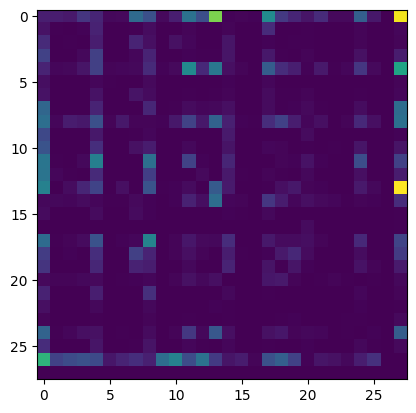

In [56]:
plt.imshow(N)

(-0.5, 27.5, 27.5, -0.5)

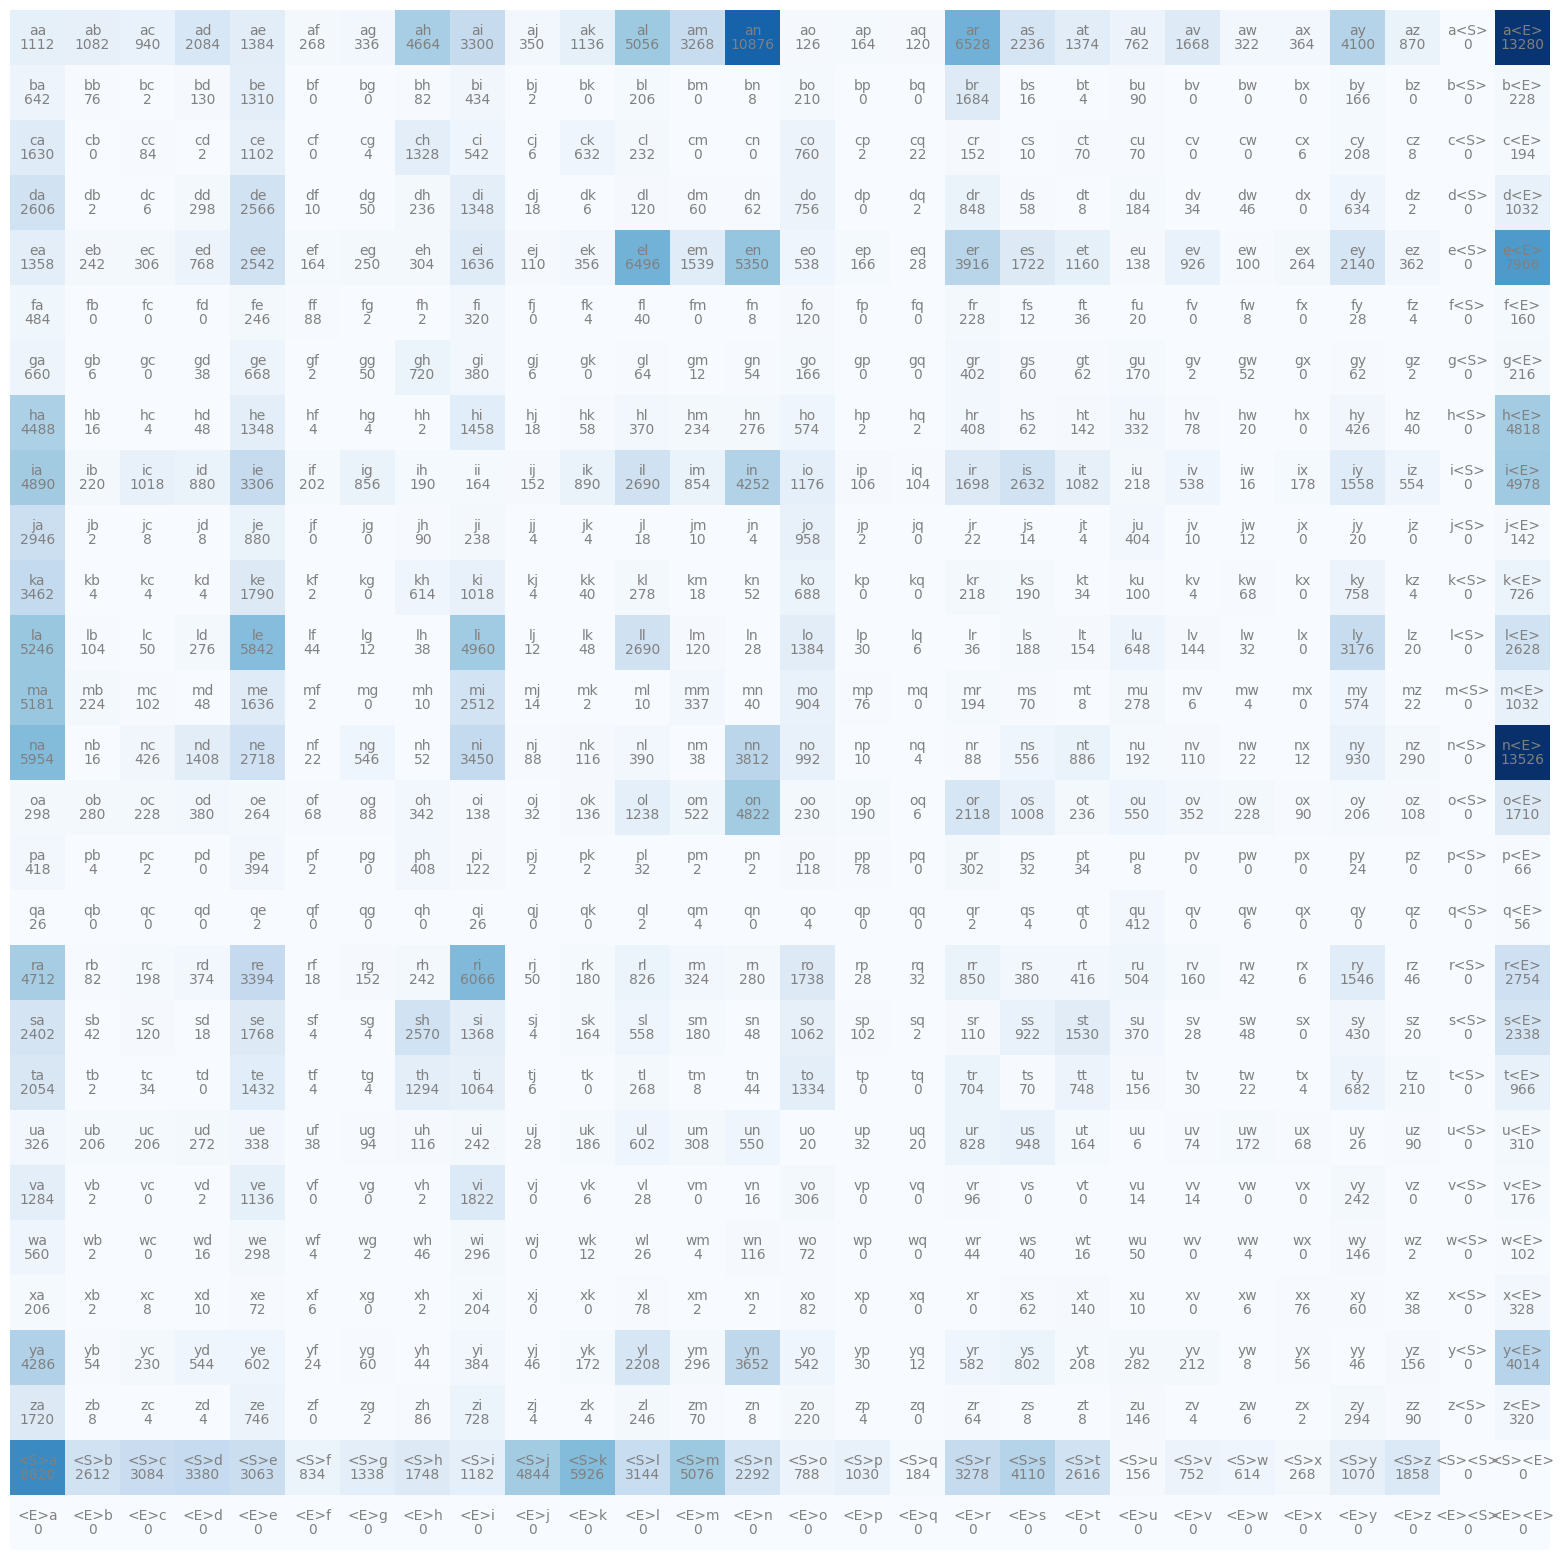

In [76]:
plt.figure(figsize=(20, 20))
plt.imshow(N, cmap="Blues")
for i in range(N.shape[0]):
    for j in range(N.shape[1]):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")